<a href="https://colab.research.google.com/github/maximecharriere/movie-chatbot/blob/master/Copie_de_movie_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chatbot cinéphile - WELCOME**
*Par Dylan **Morocutti** et Maxime **Charrière**.*

# Libraries importation

In [101]:
try:
    from google.colab import files
    IN_COLAB = True
except:
    IN_COLAB = False


import numpy as np
# import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
# import nltk
# from nltk.corpus import treebank, nps_chat
# from nltk.cluster import KMeansClusterer
import pandas as pd
# import gensim
# from gensim.models import Word2Vec
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn import cluster
# from sklearn import metrics
import spacy
import pickle

nlp = spacy.load("en_core_web_sm")

print("Libraries version:")
print(f"Numpy:      {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
# print(f"Tensorflow: {tf.__version__}")
# print(f"NLTK:       {nltk.__version__}")
print(f"Pandas:     {pd.__version__}")
# print(f"Gensim:     {gensim.__version__}")
print(f"Sklearn:    {sklearn.__version__}")
print(f"Spacy:      {spacy.__version__}")

Libraries version:
Numpy:      1.18.1
Matplotlib: 3.1.3
Pandas:     1.0.3
Sklearn:    0.22.1
Spacy:      2.2.4


## Function

In [2]:
def myTokenizer(text):
    tokens = nlp(text)
    return [token.lemma_.lower() for token in tokens if not token.is_punct and not token.is_digit and not token.is_space and not token.is_stop]

## Data preparation

In [3]:
## Data importation
url_movie_wiki = "https://raw.githubusercontent.com/maximecharriere/movie-chatbot/master/MoviesClassifier/data/wiki_movie_plots.csv"
movies = pd.read_csv(url_movie_wiki, sep=',')[['Title','Plot','Genre']]
movies.head(20)

,Title,Plot,Genre
0,Kansas Saloon Smashers,"A bartender is working at a saloon, serving dr...",unknown
1,Love by the Light of the Moon,"The moon, painted with a smiling face hangs ov...",unknown
2,The Martyred Presidents,"The film, just over a minute long, is composed...",unknown
3,"Terrible Teddy, the Grizzly King",Lasting just 61 seconds and consisting of two ...,unknown
4,Jack and the Beanstalk,The earliest known adaptation of the classic f...,unknown
5,Alice in Wonderland,"Alice follows a large white rabbit down a ""Rab...",unknown
6,The Great Train Robbery,The film opens with two bandits breaking into ...,western
7,The Suburbanite,The film is about a family who move to the sub...,comedy
8,The Little Train Robbery,The opening scene shows the interior of the ro...,unknown
9,The Night Before Christmas,Scenes are introduced using lines of the poem....,unknown


In [4]:
print(f"Nombre de catégories: {len(movies['Genre'].value_counts())}")

Nombre de catégories: 2265


In [5]:
## Manual harmonization of categories

movies['GenreCorrected']=movies['Genre'] 
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('/', ' ')

# Delete unwanted categories
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('unknown', '')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[not in citation given\]','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('avant-garde','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('period','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('national','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('board','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('costume','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movies','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movie','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('films','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('film','')

# Rename categories
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-pic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biopic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographical', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biodrama', 'biography drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-drama', 'biography drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animated','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('anime','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('disaster','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedey','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramedy','comedy drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('mockumentary','documentary')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historical','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historic','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('prehistoric','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('mythology','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romantic','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3-d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci-fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('ttriller','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science fiction','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung-fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial arts','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bruceploitation','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedy-drama adaptation of the mordecai richler novel','comedy drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('stop-motion','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming of age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming-of-age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('drama about child soldiers','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('melodrama','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('tv miniseries','serial')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('television miniseries','serial')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("war-time","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wartime","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war ii','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war i','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("tokusatsu","action")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("ww1","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wwii","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroes','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroe','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familya','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familydrama','family drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('famil ','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('espionage','spy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('noir','black')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dark','black')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psychological','psycho')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('rom-com','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gun fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('docudrama','documentary drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('football','sports')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial art','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotica','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotic','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('musical','music')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gangster','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('swashbuckler','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('police','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dance','sport')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sports','sport')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('muslim','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('propaganda','political')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('samurai','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sexploitation','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('homosexual','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('socio','social')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sexual','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sex','adult')

# Merge some categories
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('family','child')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial_arts','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('horror','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('war','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventure','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science_fiction','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('spy','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superhero','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('suspense','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('thriller','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('epic','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('crime','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('western','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('music','cultural')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sport','cultural')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography','cultural')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('history','cultural')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('documentary','cultural')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('political','cultural')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science','cultural')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psycho','cultural')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('mystery','thriller')


print(f"Nombre de catégories: {len(movies['GenreCorrected'].value_counts())}")

Nombre de catégories: 1411


In [6]:
## Automatic harmonization of categories and listing of them

nlp = spacy.load("en_core_web_sm")

movies['GenreListed'] = movies['GenreCorrected']

for genre in movies['GenreCorrected'].unique():
  tokens = nlp(genre)
  listed_genre = [token.lemma_.lower() for token in tokens if not token.is_punct and not token.is_digit and not token.is_space and not token.is_stop]
  for i in np.where(movies['GenreCorrected']==genre)[0]:
    movies.at[i,'GenreListed'] = np.unique(np.array(listed_genre))

movies.head(20)

,Title,Plot,Genre,GenreCorrected,GenreListed
0,Kansas Saloon Smashers,"A bartender is working at a saloon, serving dr...",unknown,,[]
1,Love by the Light of the Moon,"The moon, painted with a smiling face hangs ov...",unknown,,[]
2,The Martyred Presidents,"The film, just over a minute long, is composed...",unknown,,[]
3,"Terrible Teddy, the Grizzly King",Lasting just 61 seconds and consisting of two ...,unknown,,[]
4,Jack and the Beanstalk,The earliest known adaptation of the classic f...,unknown,,[]
5,Alice in Wonderland,"Alice follows a large white rabbit down a ""Rab...",unknown,,[]
6,The Great Train Robbery,The film opens with two bandits breaking into ...,western,action,[action]
7,The Suburbanite,The film is about a family who move to the sub...,comedy,comedy,[comedy]
8,The Little Train Robbery,The opening scene shows the interior of the ro...,unknown,,[]
9,The Night Before Christmas,Scenes are introduced using lines of the poem....,unknown,,[]


In [7]:
# Saving of all film
movies[['Title','Genre','GenreCorrected','GenreListed']].to_csv('data/completGenres.csv')

if IN_COLAB:
    files.download('data/completGenres.csv') 

In [8]:
## Listing of all unique categories and their occurrence
genres_array = np.array([])
for genre in movies['GenreListed']:
    genres_array = np.concatenate((genres_array, genre ))
uniqueGenre, uniqueGenreCount = np.unique(genres_array, return_counts=True)
print(f"Nombre de catégories: {len(uniqueGenre)}")

Nombre de catégories: 559


In [9]:
# Saving of unique categories
genres = pd.DataFrame({'Genre':uniqueGenre, 'Count':uniqueGenreCount}).sort_values(by=['Count'], ascending = False, ignore_index=True)
genres.to_csv('data/uniqueGenres.csv')

if IN_COLAB:
    files.download('data/uniqueGenres.csv') 

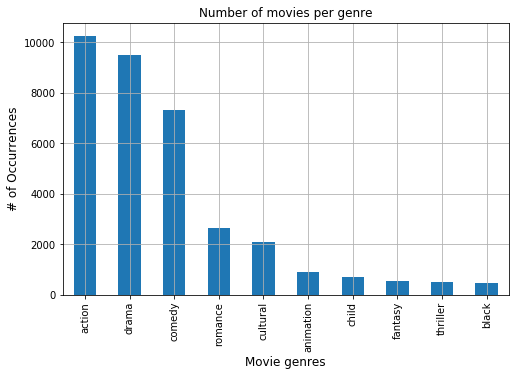

In [10]:
## Show 10 main categories
mainGenres = genres.loc[:9,:]
mainGenres.plot(x='Genre', y='Count', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of movies per genre")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Movie genres', fontsize=12)
plt.show()

In [11]:
## Keep only the main categories
movies['MainGenre'] = movies['GenreListed'].apply(lambda x: x[np.in1d(x,mainGenres)])

C:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
## Keep only films with categories
selectedMovies = movies[movies['MainGenre'].apply(len)>0]
print(f"All movies:      {movies.shape[0]}\nSelected movies: {selectedMovies.shape[0]}")

All movies:      34886
Selected movies: 28130


In [23]:
# Creat the output layer with all categories
categoriesVector = selectedMovies.MainGenre.apply(lambda x: '-'.join(x)).str.get_dummies(sep='-')
selectedMovies = pd.concat([selectedMovies, categoriesVector], axis=1)

categoriesVector

,action,animation,black,child,comedy,cultural,drama,fantasy,romance,thriller
6,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,1,0,0,0,0
14,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
34877,0,0,0,0,0,0,1,0,0,0
34882,0,0,0,0,1,0,0,0,0,0
34883,0,0,0,0,1,0,0,0,0,0
34884,0,0,0,0,1,0,0,0,1,0


# Features preparation (TF-iDF)

## Splitting The Data into Training and Test Sets

In [14]:
rawPlot_train, rawPlot_test, cat_train, cat_test = train_test_split(selectedMovies.Plot, categoriesVector, random_state=13 train_size=0.8, shuffle=True) #80% 20%

In [91]:
catVector_train = pd.DataFrame(cat_train, columns=mainGenres.Genre)
catVector_test = pd.DataFrame(cat_test, columns=mainGenres.Genre)

In [15]:
%%time
# Learn vocabulary from training texts
# Save variable into pickle file so you don't have to re-calculate it
try:
    plotVectorizer
except:
    plotVectorizer  = TfidfVectorizer(tokenizer = myTokenizer, min_df=3, max_features=10000)
    try:
        with open('data/plotVectorizer.pickle', 'rb') as fd:
            plotVectorizer = pickle.load(fd)
    except:
        plotVectorizer.fit(rawPlot_train)
        with open("data/plotVectorizer.pickle", 'wb') as fd:
            pickle.dump(plotVectorizer, fd)
            
        if IN_COLAB:
            files.download('data/plotVectorizer.pickle') 

C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Wall time: 22min 3s


In [16]:
%%time
# Vectorize the training texts

try:
    plotVector_train
except:
    try:
        with open('data/plotVector_train.pickle', 'rb') as fd:
            plotVector_train = pickle.load(fd)
    except:
        plotVector_train = plotVectorizer.transform(rawPlot_train)
        with open("data/plotVector_train.pickle", 'wb') as fd:
            pickle.dump(plotVector_train, fd)
            
        if IN_COLAB:
            files.download('data/plotVector_train.pickle') 

Wall time: 21min 47s


In [110]:
%%time
# Vectorize the validation texts.

try:
    plotVector_test
except:
    try:
        with open('data/plotVector_test.pickle', 'rb') as fd:
            plotVector_test = pickle.load(fd)
    except:
        plotVector_test = plotVectorizer.transform(rawPlot_test)
        with open("data/plotVector_test.pickle", 'wb') as fd:
            pickle.dump(plotVector_test, fd)
            
        if IN_COLAB:
            files.download('data/plotVector_test.pickle') 

Wall time: 5min 28s


# Naive Bayes Classification

In [79]:
print(f"Raw text:\n {rawPlot_train.iloc[0]}\n")
print(f"Tockens:\n  {plotVectorizer.inverse_transform(plotVector_train[0].toarray())}")

Raw text:
 In this short, the rotund early-1940s version of Elmer Fudd is portrayed as a Mountie, in pursuit of Bugs Bunny, who is wanted dead or alive (though preferably dead). After following rabbit tracks to a burrow, Elmer tries to lure Bugs out but instead of getting Bugs in the handcuffs, he gets a bomb and frantically searches for his lost keys. Bugs then looks for the handcuff key while going through keys to "the garage, the car, the front door"—Bugs then whistles to the audience ("woo woo!")--"and the back door," and finally has the key, but then a tremendous explosion is heard off-screen; and as Bugs tells the audience "Oh, well," Elmer finally catches and tells him he's in under arrest for a litany crimes, as shown to be stated by Elmer Fudd. The crimes, as corrected here for Elmer's rounded-l-and-r speech, are listed below:
"Resisting an officer, assault and battery, trespassing, disturbing the peace, miscellaneous misdemeanors, public nuisance, traffic violations, going th

In [106]:
plotVector_test

NameError: name 'plotVector_test' is not defined

In [94]:
plotVector_train

<22504x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2644012 stored elements in Compressed Sparse Row format>

In [92]:
catVector_train.drama

0        0
1        1
2        0
3        1
4        0
        ..
22499    1
22500    1
22501    0
22502    0
22503    1
Name: drama, Length: 22504, dtype: int32

In [99]:
multinomialNB=OneVsRestClassifier(MultinomialNB())
multinomialNB.fit(plotVector_train, catVector_train.action)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [104]:
plotVector_test

NameError: name 'plotVector_test' is not defined

In [113]:
prediction = multinomialNB.predict(plotVector_test)
accuracy_score(catVector_test.action, prediction)

0.7813722004976893

## Training the classifiers

In [120]:
nbClassifiers=pd.DataFrame(columns=['Genre', 'Classifier', 'Accuracy'])
for i, genre in enumerate(mainGenres.Genre):
    multinomialNB=OneVsRestClassifier(MultinomialNB())
    multinomialNB.fit(plotVector_train, catVector_train[genre])
    prediction = multinomialNB.predict(plotVector_test)
    nbClassifiers.loc[i,'Genre'] = genre    
    nbClassifiers.loc[i,'Classifier'] = multinomialNB
    nbClassifiers.loc[i,'Accuracy'] = accuracy_score(catVector_test[genre], prediction)

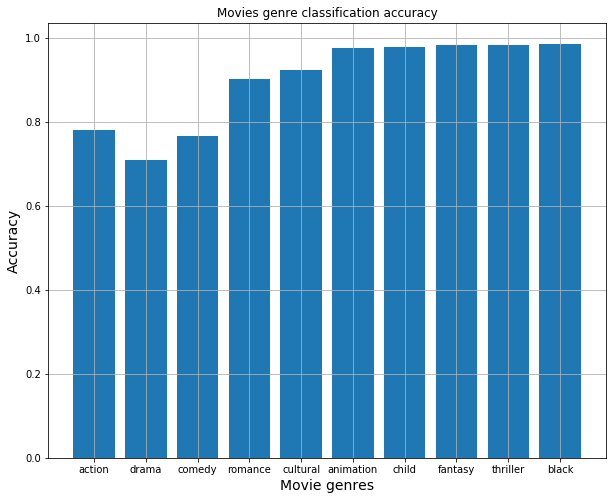

In [134]:
plt.figure(figsize=(10,8))
plt.bar(nbClassifiers.Genre, height=nbClassifiers.Accuracy)
plt.grid()
plt.title("Movies genre classification accuracy")
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Movie genres', fontsize=14)
plt.show()

## Detection de genre

In [177]:
def genreClassifier(text, vectorizer, classifier):
    predictions = pd.DataFrame(columns=['Genre', 'Prediction', 'Probality'])
    textVector = vectorizer.transform([text])
    for i,genre in enumerate(classifier.Genre):
        predictions.loc[i,'Genre'] = genre
        predictions.loc[i,'Prediction'] =  nbClassifiers.loc[i,'Classifier'].predict(textVector)
        predictions.loc[i,'Probality'] =  nbClassifiers.loc[i,'Classifier'].predict_proba(textVector)[0,1]
    return predictions

In [178]:
plot_fastFurious = "After defeating Owen Shaw and his crew and securing amnesty for their past crimes,[N 1] Dominic 'Dom' Toretto, Brian O'Conner, and the rest of their team have returned to the United States to live peaceful, normal lives again, thanks to DSS agent Luke Hobbs erasing their criminal records. Brian begins to accustom himself to life as a father, while Dom tries to help Letty Ortiz regain her memory. Meanwhile, Owen's older brother, Deckard Shaw, breaks into the secure hospital in London, England that the comatose Owen is being held in and swears vengeance against Dom and his team, before breaking into Luke Hobbs' DSS HQ office in Los Angeles to extract profiles of Dom's crew. After revealing his identity, Shaw engages Hobbs in a fight and escapes when he detonates a bomb that severely injures Hobbs. Dom later learns from his sister Mia that she is pregnant again and convinces her to tell Brian. However, a letter bomb sent from Tokyo, explodes and destroys the Toretto house just seconds after Han, a member of Dom's team, is apparently killed by Shaw in Tokyo.[N 2] Dom visits Hobbs in a hospital, where he learns that Shaw is a rogue special forces assassin seeking to avenge his brother. Dom travels to Tokyo to reclaim Han's corpse and acquires personal items found at Han's crash site from Han's friend, Sean Boswell.As Dom, Brian, Tej, and Roman mourn Han and Gisele’s deaths at Han's funeral in Los Angeles, Dom notices a car eerily observing them, and after a lengthy car chase through the city streets, confronts its driver in an underground tunnel, who is revealed to be Shaw. Shaw flees when a covert ops team arrives and opens fire, led by Mr. Nobody. At his air base of operations in San Diego, Nobody says that he will assist Dom in stopping Shaw if he helps him obtain God's Eye, a computer program that uses digital devices to track down a person, and save its creator, a hacker named Ramsey, from an African mercenary terrorist named Mose Jakande. Dom, Brian, Letty, Roman Pearce, and Tej Parker then airdrop their cars over the Caucasus Mountains in Azerbaijan, ambush Jakande's convoy, and rescue Ramsey. The team then jets off to Abu Dhabi in a military plane, where a billionaire has acquired the flash drive containing God's Eye and manages to steal it from the owner after the team secretly infiltrates a gala at Etihad Towers dressed in formalwear. With God's Eye near telecommunications repeaters, the team tracks down Shaw, who is waiting at a remote factory. Dom, Brian, Nobody, and his team attempt to capture Shaw, but are ambushed by Jakande and his men and are forced to flee while Jakande obtains God's Eye. At his own request, the injured Nobody is left behind to be airlifted by helicopter while Brian and Dom continue on without him. To reduce their disadvantage, the crew returns home to Los Angeles to fight Shaw, Jakande, and his henchmen. Dom plans to singlehandedly fight Shaw alone, while Letty, Brian, Tej and Roman plan to protect Ramsey from the wrath of Jakande. Meanwhile, Brian phones Mia, warning her about the upcoming final showdown, warning her that he may not come back alive but Mia gives him the courage to prevail after revealing her pregnancy. Brian promises Mia that he will retire from his criminal lifestyle and fully dedicate himself to their family after he defeats Shaw and Jakande. Deckard, Dom and Brian then gear up for the ultimate final showdown, fully under arms and armed to the teeth.As Jakande pursues Brian and the rest of the team with a stealth helicopter and an aerial drone, Ramsey attempts to hack into God's Eye. Hobbs, seeing the team in trouble after Jakande takes out a cell tower, break sout of the hospital and destroys the drone with an ambulance. Brian engages Jakande's henchman Kiet and defeats him by tying a weight to him and shoves him down an elevator shaft before hijacking a signal repeater tower, allowing Ramsey to regain control of God's Eye and shut it down. Dom and Shaw engage in a one-on-one brawl on top of a public parking garage, before Jakande intervenes and attacks them both. Shaw is defeated when part of the parking garage collapses beneath him. Dom then launches his 1970 Dodge Charger at Jakande's helicopter, hooking Shaw's bag of grenades onto its skids, though his car crash-lands in a mountain of rubble. Hobbs then shoots the bag of grenades from ground level, destroying the helicopter and killing Jakande. Dom is pulled from the wreckage of his car, believed to be dead. As Letty cradles Dom's body in her arms, she reveals that she has fully regained all her memories back, and that she remembers everything about her pre-amnesiac life, especially their wedding in the Dominican Republic. Dom regains consciousness soon after, remarking, 'It's about time'.Shaw is taken into custody by Hobbs and locked away in a secret, high-security prison. The rest of the team relaxes on a tropical beach in the Dominican Republic, enjoying the sun. Brian and Mia play in the sand with their son Jack by the water while Dom, Letty, Roman, Tej, and Ramsey observe, acknowledging that Brian is better off happily retired with his family and realizing that Brian’s place is now raising a family instead of on the road with them. Overcome with emotion, Dom stands up to silently leave. Ramsey asks if he intends to say goodbye. Dom says, 'It's never goodbye.' Alone and downcast, Dom drives along the Southern California countryside. As Dom pulls up to a four-way stop, Brian catches up with him and pull up in a car beside Dom, teasing him for leaving without a goodbye. In their last moment together, the duo exchange pleasantries and race across the freeway as Dom continues to reminisce in voiceover.Dom remembers all the fun times that he had with Brian as memoriam montage flashbacks of Walker’s moments as Brian in previous Fast and Furious films appear on the screen. They bid each other farewell after approaching a fork in the road and part company, with Brian veering off as Dom continues on the road ahead, driving off in separate directions."
genreClassifier(plot_fastFurious, plotVectorizer, nbClassifiers)

,Genre,Prediction,Probality
0,action,[1],0.842264
1,drama,[0],0.172148
2,comedy,[0],0.193684
3,romance,[0],0.0128605
4,cultural,[0],0.0348159
5,animation,[0],0.0106176
6,child,[0],0.00605424
7,fantasy,[0],0.00556362
8,thriller,[0],0.00332677
9,black,[0],0.00339936


In [179]:
plot_saw = "Two men, Brad and Ryan, awaken in a Metropolitan Storefront, bound at the wrists to opposite sides of a worktable with a circular saw in front of each of them. Their mutual lover, Dina, is suspended above a third saw, and Jigsaw's puppet informs the men that Dina has been manipulating both of them, driving them into criminal activity to fulfill her material desires. They are given a choice — either Brad or Ryan can be killed, or let Dina die. They initially fight each other, during which Brad is cut by the saw. However, Ryan notices Dina is only cheering for whoever's winning, making him realize she's only using them, so he makes peace with Brad, and they allow Dina to die instead.After witnessing Mark Hoffman's survival and being attacked, Jill Tuck meets Matt Gibson, an internal affairs detective from the precinct where he works, and incriminates him in exchange for protection and immunity from prosecution. Gibson, who has distrusted Hoffman for years, agrees to her terms. Meanwhile, Hoffman abducts a skinhead gang — Dan, Evan, Jake, and Kara — and places them in a junkyard trap that kills them all, leaving the reverse bear trap at the scene to incriminate Jill, who is later put into protective custody. After a meeting of Jigsaw survivors, including Lawrence Gordon, who cauterized his leg on a steam pipe after escaping the bathroom, Hoffman abducts Bobby Dagen, a self-help guru who achieved fame and fortune by falsifying a story of his own survival. He sends Gibson some videos with cryptic clues to the game's location, offering to end the games if Jill is given to him.Meanwhile, Bobby awakens in a cage in an abandoned asylum and is told that his wife Joyce will die if he doesn't save her within one hour. Joyce is chained at the neck to a steel platform that gradually pulls her down as she watches Bobby's progress. After he escapes the cage, which dangles over a floor of spikes, he begins searching for Joyce. Along the way, he finds Nina, his publicist; Suzanne, his lawyer; and Cale, his best friend and co-conspirator, in separate traps representing the three wise monkeys and all of them are killed despite his efforts to save them. After removing his upper wisdom teeth to obtain the combination for a security door, Bobby finds Joyce and is forced to reenact the trap he claimed to have survived: he must drive two hooks through his pectoral muscles and hoist himself up to the ceiling to deactivate her trap. He fails nonetheless, and is forced to watch as a brazen bull capsule closes around Joyce and incinerates her to death.Gibson eventually discovers the game's location and sends a SWAT team, who are sealed in another room and killed by toxic gas. Simultaneously, he and two officers infiltrate Hoffman's command center in the junkyard, where they find Dan's corpse sitting in front of several monitors connected to the police headquarter's security cameras. He sees Hoffman brought into the morgue in a body bag and tries to warn Palmer, but an automatic turret gun rises up and kills him along with his men. Hoffman kills Dr. Heffner, Palmer, and everyone else in his path to Jill, who briefly escapes before she is caught and knocked unconscious. He straps her to a chair and locks a reverse bear trap to her head; she awakens as the timer starts and is killed when the trap activates, tearing her jaws apart.After destroying his workshop, Hoffman is attacked and subdued by three pig-masked figures, one of whom is Lawrence Gordon. Flashbacks show that John Kramer found him unconscious by the steam pipe and nursed him back to health, and Gordon has assisted him ever since. This was known only by Jill, who delivered a package to him at the hospital, which contained a videotape, in which John asked him to watch over Jill and take action if anything happened to her. As a result, Gordon has Hoffman brought to the bathroom from the first film and shackled by the ankle to a pipe. When Hoffman tries to reach for the hacksaw used to sever Gordon's leg, in an effort to escape, Gordon throws it out of the room, turns off the lights and yells 'Game Over', before sealing the door, leaving Hoffman to die."
genreClassifier(plot_saw, plotVectorizer, nbClassifiers)

,Genre,Prediction,Probality
0,action,[1],0.897687
1,drama,[0],0.0865781
2,comedy,[0],0.107217
3,romance,[0],0.00582802
4,cultural,[0],0.0141915
5,animation,[0],0.0110624
6,child,[0],0.00421982
7,fantasy,[0],0.00380892
8,thriller,[0],0.00262786
9,black,[0],0.0047753


In [180]:
plot_NeighborTotoro = "In 1958 Japan, university professor Tatsuo Kusakabe and his two daughters, Satsuki and Mei, move into an old house to be closer to the hospital where the girls' mother, Yasuko, is recovering from a long-term illness. The house is inhabited by tiny creatures called susuwatari—small, dark, dust-like house spirits seen when moving from light to dark places. When the girls become comfortable in their new house, the soot spirits leave to find another empty house.One day, Mei discovers two small spirits who lead her into the hollow of a large camphor tree. She befriends a larger spirit, which identifies itself by a series of roars that she interprets as 'Totoro'. She falls asleep atop Totoro, but when Satsuki finds her, she is on the ground. Despite many attempts, Mei is unable to show her family Totoro's tree. Tatsuo comforts her by telling her that Totoro will reveal himself when he wants to.One rainy night, the girls are waiting for Tatsuo's bus, which is late. Mei falls asleep on Satsuki's back, and Totoro appears beside them, allowing Satsuki to see him for the first time. Totoro has only a leaf on his head for protection against the rain, so Satsuki offers him the umbrella she had taken for her father. Totoro is delighted and gives her a bundle of nuts and seeds in return. A giant, bus-shaped cat halts at the stop, and Totoro boards it and leaves. Shortly after, Tatsuo's bus arrives.The girls plant the seeds. A few days later, they awaken at midnight to find Totoro and his colleagues engaged in a ceremonial dance around the planted seeds. The girls join in and the seeds grow into an enormous tree. Totoro takes the girls for a ride on a magical flying top. In the morning, the tree is gone but the seeds have indeed sprouted; it is left unclear whether the girls were dreaming.The girls find out that a planned visit by Yasuko has to be postponed because of a setback in her treatment. Mei does not take this well and argues with Satsuki, later leaving for the hospital to bring fresh corn to Yasuko. Her disappearance prompts Satsuki and the neighbors to search for her. In desperation, Satsuki returns to the camphor tree and pleads for Totoro's help. Delighted to help, he summons the Catbus, which carries her to where the lost Mei sits. The bus then whisks them over the countryside to see Yasuko in the hospital. The girls overhear a conversation between their parents and discover that she has been kept in hospital by a minor cold but is otherwise doing well. They secretly leave the ear of corn on the windowsill, where it is discovered by their parents, and return home.Eventually, Mei and Satsuki's mother returns home, and the sisters play with other children, while Totoro and his friends watch them from afar."
genreClassifier(plot_NeighborTotoro, plotVectorizer, nbClassifiers)

,Genre,Prediction,Probality
0,action,[0],0.299066
1,drama,[0],0.279619
2,comedy,[0],0.108604
3,romance,[0],0.0466083
4,cultural,[0],0.0218114
5,animation,[0],0.0253928
6,child,[0],0.00685885
7,fantasy,[0],0.00621947
8,thriller,[0],0.00127868
9,black,[0],0.000681485


In [181]:
plot_Incredibles = "Following immediately after the events of the first film, the Incredibles and Frozone battle the Underminer who has just appeared to terrorize Municiberg. Though they prevent the destruction of City Hall, they are unable to stop him from robbing a bank and escaping. The collateral damage caused by the incident outrages the government and prompts them to shut down the Superhero Relocation Program, leaving the Parrs and other former superheroes without financial assistance. Violet's love interest Tony Rydinger also discovers her superhero identity, forcing agent Rick Dicker to erase his memory of her. Frozone informs Mr. Incredible and Elastigirl of an offer from Winston Deavor, a wealthy businessman. He and his sister Evelyn propose sending the heroes on secret missions which will be recorded and publicized to regain public trust in superheroes.Due to Mr. Incredible's tendency to accidentally cause collateral damage, Winston chooses Elastigirl for the initial missions. While Elastigirl is away, Bob struggles with his new role as a stay-at-home parent: Dash has trouble with math homework, Violet becomes withdrawn after Tony fails to show up for their first date due to his memory wipe, and Jack-Jack wreaks havoc with his burgeoning superpowers. He takes Jack-Jack to Edna Mode, who develops a suit that helps control his abilities. Meanwhile, on her missions, Elastigirl encounters a mysterious supervillain called the Screenslaver, who projects hypnotic images via TV screens. After preventing him from destroying a crowded runaway commuter train, and thwarting his attempt to assassinate a diplomat, she tracks him down to his hideout in an apartment building, and following a brief struggle, unmasks him as a pizza deliveryman who claims to have no recollection of his actions.At a party celebrating the Screenslaver's arrest, Winston announces a summit of world leaders to legalize superheroes, hosted aboard his luxury hydrofoil yacht, the Everjust. Unsettled by the ease with which she captured the Screenslaver, Elastigirl realizes that he was being controlled by a pair of mind-control goggles. Evelyn forces the goggles onto Elastigirl, revealing herself to be the mastermind behind the Screenslaver. Evelyn explains that she has hated superheroes since Gazerbeam and Fironic failed to save her father when he was murdered by burglars. The event led her to conclude that superheroes have taken independence from society, who in turn had become dangerously over-reliant on superheroes. She plans to sabotage her brother's summit and cause a catastrophe that will tarnish the reputation of superheroes, ensuring they remain outlawed forever. Using Elastigirl, she lures Bob into a trap, then sends another group of hypnotized superheroes previously invited to the summit to subdue the Parr children. Frozone tries to protect them, but is overwhelmed and placed under Evelyn's control.Violet, Dash, and Jack-Jack escape with the help of the Incredi-bile, a high-tech car once owned by their father, and reach Winston's hydrofoil yacht. On board, the hypnotized Mr. Incredible, Elastigirl, and Frozone recite a vindictive manifesto on air designed to paint superheroes as a threat. They subdue the ship's crew, aim the hydrofoil at Municiberg, and destroy the controls. The Parr children reach them, and Jack-Jack removes Elastigirl's goggles. She in turn frees Mr. Incredible and Frozone. The Incredibles and Frozone release the other mind-controlled superheroes by destroying their goggles, then work together to prevent the Everjust from crashing into the city by turning the ship. Evelyn attempts to escape in a jet, but is apprehended by Elastigirl and arrested. Due to their actions, superheroes around the world regain legal status.Later, Tony accompanies Violet to a movie with the family. When the Parrs spot a high-speed pursuit of gunmen by the police, Violet leaves Tony at the theater, promising to be back in time, and the Incredibles give chase in a remodeled Incredimobile."
genreClassifier(plot_Incredibles, plotVectorizer, nbClassifiers)

,Genre,Prediction,Probality
0,action,[1],0.573881
1,drama,[0],0.079402
2,comedy,[0],0.343213
3,romance,[0],0.0140208
4,cultural,[0],0.0221594
5,animation,[0],0.0130411
6,child,[0],0.00358857
7,fantasy,[0],0.00289792
8,thriller,[0],0.00148343
9,black,[0],0.0014228


In [182]:
plot_EternalSunshineOfTheSpotlessMind = "Shy, soft-spoken Joel Barish and unrestrained free spirit Clementine Kruczynski meet on a Long Island Rail Road train from Montauk to Rockville Centre. Both had felt the need to travel to Montauk that day, and they almost immediately connect, feeling drawn to each other despite their contrasting personalities. Although Joel and Clementine do not realize it, they were once in a relationship, having separated after dating for two years. After a fight, Clementine had hired the New York City firm Lacuna, Inc. to erase all her memories of their relationship. Upon discovering this from his friends Rob and Carrie, Joel decides to undergo the procedure himself.The narrative subsequently takes place in Joel's mind during the memory erasing procedure. Joel finds himself revisiting his memories of Clementine in reverse, starting from the downfall of their relationship. As he comes across happier memories of Clementine early in their relationship, he attempts to preserve at least some memory of her and his love for her, trying to evade the procedure by taking his idealized memory of Clementine into memories not linked to her and attempting to wake up and stop the process. Despite his efforts, the technicians succeed in erasing his memories. Joel comes to the last remaining memory of Clementine, the day he first met her at a beach house in Montauk. As the memory disintegrates around them, she whispers to meet her in Montauk. This leads to both Joel and Clementine travelling to Montauk, where they subsequently meet on the train.A separate story arc occurs during Joel's memory erasure, revolving around Lacuna's employees. Patrick, one of the Lacuna technicians performing the erasure, uses Joel's memories and his mementos of Clementine to seduce and date her in the present. Mary, the Lacuna receptionist, is dating another technician, Stan, but has feelings for the married head of Lacuna, Dr. Howard Mierzwiak. During Joel's memory wipe, Mary discovers she previously had an affair with Dr. Mierzwiak and agreed to have the affair erased from her memory after Dr. Mierzwiak's wife found out. Devastated by this discovery, Mary quits her job and steals the company's records, mailing all of Lacuna's clients the tapes of each client recounting their memories to be erased.In the present, Joel and Clementine meet at the Montauk train station and are eager to begin what appears to be a new and exciting relationship. When they both receive their Lacuna records mailed by Mary, they are shocked and disturbed by the bitter memories they have of each other. Clementine attempts to leave, saying that the relationship might end the same way it did in the tapes. They realize that flaws in their relationship are inevitable but decide to go on with it, believing that they are meant to be together."
genreClassifier(plot_EternalSunshineOfTheSpotlessMind, plotVectorizer, nbClassifiers)

,Genre,Prediction,Probality
0,action,[0],0.349854
1,drama,[1],0.505301
2,comedy,[0],0.206322
3,romance,[0],0.0929681
4,cultural,[0],0.0286234
5,animation,[0],0.00751449
6,child,[0],0.00572526
7,fantasy,[0],0.00466759
8,thriller,[0],0.00404713
9,black,[0],0.00359221


In [183]:
plot_LoveAndBasketball = "Monica and Quincy have wanted to be professional basketball stars since they were kids. The two became childhood sweethearts in 1981, when Monica’s family moved to Los Angeles from Atlanta, moving into the house next door to Quincy’s. Quincy's father, Zeke, is the star shooting guard for the Los Angeles Clippers. Quincy is shocked that a girl could love basketball as much as he does, and can play so well. They share their first kiss on the first day of school.The story jumps to 1988, when both Monica and Quincy are the respective leaders of their high school teams, with Quincy touted as one of the top prospects in the country. While popular with the girls, he and Monica are still good friends.Monica, on the other hand, struggles with her fiery emotions on the court, often resulting in technical fouls at critical moments of games, damaging potential scouting opportunities. Monica also struggles with the emotions she secretly still harbors for Quincy. She also struggles with her mother, Camille, pressuring her to give up basketball and 'act like a lady.' Through soul searching, Monica learns to control her emotions and leads her team to the state championship game. When she and her team came up short, Monica feels devastated.Monica begins to recover from the championship loss with the help of her older sister, Lena, who gives her a makeover. She even finds Monica a college friend to take her to her spring dance. Despite having a date of his own, Quincy notices Monica and compliments her new appearance. Later that night, they both speak outside her window and reveal to each other how their dates didn't meet their needs. Monica asks Quincy to open her letter from USC – which reveals she has been accepted. Quincy has accepted an offer from USC as well, and they celebrate with a kiss. This leads to them finally acting on their feelings, making love that night.The story moves to their freshman year at USC, where they are managing themselves as athletes, students, and a couple. While Quincy finds instant success on the court, Monica struggles for playing time, behind senior guard Sidra O'Neal. Monica has run ins with the head coach, Ellie Davis. Her relationship with Quincy becomes more and more strained. Quincy struggles to deal with the media attention, while clashing against his father’s efforts to convince Quincy to finish college before going pro. While Monica earns the starting point guard spot at the end of the season, Quincy feels she was not there for him when he was having problems with his father, and the couple splits up.The story jumps to 1993. Monica is playing professional basketball with an International Women's Basketball Association (IBWA) team in Barcelona. She misses home, but can't imagine a life that doesn’t include basketball. While Monica leads her team to a dominant victory in the championship game, she starts to realize that her love for basketball isn't the same as it was before.Having left USC after his freshman season, Quincy is now in his fifth year in the pros. He has been traded to the Los Angeles Lakers, but tears his ACL in a game. Monica flies home to see him, and is saddened to meet Quincy's fiancée, Kyra. Monica also falls into the usual squabbles with her mother Camille.Quincy completes physical therapy, while his wedding draws closer. Monica has quit basketball to work at a bank. Seeing how unhappy Monica is, Camille encourages her to fight for her career and the man she loves.Quincy and Monica meet and reminisce. Monica challenges him to a game of one-on-one, with high stakes; if he loses, he calls off the wedding and chooses Monica. Quincy agrees and wins, but can no longer be apart from Monica and chooses her instead.The film jumps to 1998. Monica is playing in the new WNBA. Quincy and their baby daughter cheer on Monica during her game.In a post-credits scene, Quincy and Monica's baby daughter is shown playing basketball in a park playground."
genreClassifier(plot_LoveAndBasketball, plotVectorizer, nbClassifiers)

,Genre,Prediction,Probality
0,action,[0],0.109353
1,drama,[0],0.428016
2,comedy,[0],0.418613
3,romance,[0],0.0505282
4,cultural,[0],0.0535246
5,animation,[0],0.00739358
6,child,[0],0.00946935
7,fantasy,[0],0.00352024
8,thriller,[0],0.00193316
9,black,[0],0.00257219


"outputs": [
{
 "name": "stdout",
 "output_type": "stream",
 "text": [
  "Wall time: 21min 47s\n"
 ]
}
],